# 卷積神經網絡(CNN)

## 1-加載 Library

In [1]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Using TensorFlow backend.


## 2-數據集處理

In [2]:
# 回傳值: ((訓練特徵, 訓練目標), (測試特徵, 測試目標))
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
label = {0:"飛機", 1:"車", 2:"鳥", 3:"貓", 4:"鹿",5:"狗", 6:"青蛙", 7:"馬", 8:"船", 9:"卡車"}

170500096/170498071 [==============================] - 6s 0us/step


圖片答案是 卡車


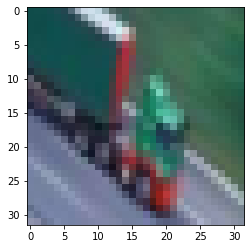

In [3]:
a = 50
print("圖片答案是", label[y_train[a][0]])
plt.imshow(x_train[a])

In [0]:
from keras.utils import np_utils
x_train_shaped = x_train.astype("float32") / 255
x_test_shaped = x_test.astype("float32") / 255
y_train_cat = np_utils.to_categorical(y_train)
y_test_cat = np_utils.to_categorical(y_test)

## 3-建立模型

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
model = Sequential()
# 第一次卷積和第一次池化
model.add(Conv2D(filters=32,
                 kernel_size=(3, 3),
                 input_shape=(32, 32, 3),
                 activation='relu',
                 padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 activation='relu',
                 padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# 把你處理過的東西攤開成為一維
model.add(Flatten())
model.add(Dropout(rate=0.25))
# 全連接層
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(10, activation='softmax'))
model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         


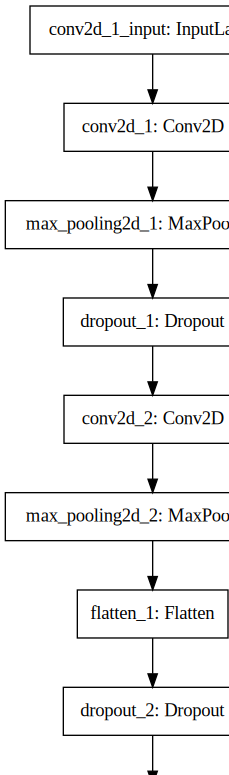

In [6]:
# 需要安裝(pip install pydotplus)
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [7]:
model.compile(loss="categorical_crossentropy",
              optimizer = "adam",
              metrics = ['accuracy'])

In [8]:
train_history = model.fit(x = x_train_shaped, y = y_train_cat,
                          validation_split = 0.1,
                          epochs = 10,
                          batch_size = 128,
                          verbose = 2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 45000 samples, validate on 5000 samples
Epoch 1/10





 - 17s - loss: 1.7027 - acc: 0.3800 - val_loss: 1.4376 - val_acc: 0.4960
Epoch 2/10
 - 3s - loss: 1.3594 - acc: 0.5142 - val_loss: 1.1933 - val_acc: 0.5898
Epoch 3/10
 - 3s - loss: 1.2177 - acc: 0.5628 - val_loss: 1.0699 - val_acc: 0.6300
Epoch 4/10
 - 3s - loss: 1.1327 - acc: 0.6014 - val_loss: 1.0041 - val_acc: 0.6478
Epoch 5/10
 - 3s - loss: 1.0612 - acc: 0.6249 - val_loss: 0.9394 - val_acc: 0.6722
Epoch 6/10
 - 3s - loss: 1.0150 - acc: 0.6413 - val_loss: 0.9263 - val_acc: 0.6790
Epoch 7/10
 - 3s - loss: 0.9780 - acc: 0.6561 - val_loss: 0.8884 - val_acc: 0.6926
Epoch 8/10
 - 3s - loss: 0.9429 - acc: 0.6653 - val_loss: 0.8726 - val_acc: 0.7014
Epoch 9/10
 - 3s - loss: 0.9104 - acc: 0.6764 - val_loss: 0.8382 - val_acc: 0.7102
Epoch 10/10
 - 3s - loss: 0.8799 - acc: 0.6894 - val_loss: 0.8456 - val_acc: 0.7136


## 4-繪圖(Non-Linear SVM)的決策邊界

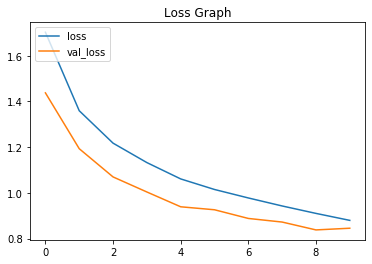

In [9]:
plt.plot(train_history.history["loss"])
plt.plot(train_history.history["val_loss"])
plt.title("Loss Graph")
plt.legend(['loss', 'val_loss'], loc="upper left")

## 5-模型準確率分析

In [10]:
pre = model.predict_classes(x_test_shaped)
print("預測標籤:", list(pre[:5]))
print("正確標籤:", list(y_test)[:5])

預測標籤: [3, 1, 8, 0, 6]
正確標籤: [array([3]), array([8]), array([8]), array([0]), array([6])]


In [11]:
e = model.evaluate(x_test_shaped, y_test_cat)
print("衡量係數:", e)
print("正確率:", e[1] * 100, "%")

10000/10000 [==============================] - 1s 70us/step
衡量係數: [0.8593256529808044, 0.7031]
正確率: 70.30999999999999 %


# 6-保存模型

In [0]:
model.save('./models/cnn1.h5')